In [2]:


import pandas  as pd
data=pd.read_csv("./csv/cail2018_big.csv")
data.head()



,accusation,death_penalty,fact,imprisonment,life_imprisonment,relevant_articles_label,fact_cut_wd,imp_label
0,['盗窃'],False,公诉机关指控：2016年3月28日20时许，被告人颜某在本市洪山区马湖新村足球场马路边捡拾到...,4,False,['264'],公诉 机关 指控 被告人 某某 马湖 足球场 马路边 捡拾 被害人 某某 CHEPAIHAO...,6
1,['盗窃'],False,天津市静海县人民检察院指控，2014年5月13日上午8时许，被告人李xx在天津市静海县大邱庄...,0,False,['264'],人民检察院 指控 上午 被告人 某某 大邱庄 宾馆 227 房间 某某 配货站 趁该 配货站...,2
2,['强奸'],False,永顺县人民检察院指控，2014年1月11日，被告人李某某与彭某某（另案处理）在永顺县塔卧镇“...,144,False,['236'],人民检察院 指控 被告人 某某 某某 另案处理 宾馆 房间内 先后 强行 被害人 某某 发生...,21
3,['盗窃'],False,公诉机关起诉书指控：\r\n2016年11月17日凌晨1时许，被告人周某在本县武康街道营盘小...,6,False,['264'],公诉 机关 起诉书 指控 凌晨 被告人 某某 武康 街道 营盘 131 南侧 过道 采用 拉...,7
4,['故意伤害'],False,大名县人民检察院起诉书指控，2014年3月25日9时许，被告人张某在自家庄某处因故与本村席某...,21,False,['234'],人民检察院 起诉书 指控 被告人 某某 自家 某某 因故 某某 发生争执 引起 打架 打架 ...,12


In [3]:
from math import log
from math import exp

In [4]:
end=300

class_cut_range=[]



start=int(exp(log(end+1)-0.2))-1


while start>=0:

    
    info=[start+1,end]
    
    class_cut_range.append(info)
#     print('{} --->{}'.format(info,round((start+1+end)/2)))
    end=int(start)
    start=int(exp(log(end+1)-0.2))-1
    
class_cut_range.append([0,0])
class_cut_range.append([-1,-1])
class_cut_range.append([-2,-2])

print(class_cut_range)
print(len(class_cut_range))


[[246, 300], [201, 245], [164, 200], [134, 163], [109, 133], [89, 108], [72, 88], [58, 71], [47, 57], [38, 46], [31, 37], [25, 30], [20, 24], [16, 19], [13, 15], [10, 12], [8, 9], [6, 7], [4, 5], [3, 3], [2, 2], [1, 1], [0, 0], [-1, -1], [-2, -2]]
25


In [5]:
imp_dict={}

start=0

class_2_imp={}
class_2_imp[0]=-2
class_2_imp[1]=-1
class_2_thr={}

class_2_thr[0]='[-2]'
class_2_thr[1]='[-1]'



for i in  range(1,len(class_cut_range)+1):
    s=class_cut_range[-i]
    print(s,start)
    imp_dict[str(s)]=start
    class_2_imp[start]=((s[0]+s[1])/2)
    start+=1
    
# class_2_imp[24]=246
# class_2_imp[23]=201
# class_2_imp[22]=164
# class_2_imp[21]=134
# class_2_imp[20]=109


print(class_2_imp)


[-2, -2] 0
[-1, -1] 1
[0, 0] 2
[1, 1] 3
[2, 2] 4
[3, 3] 5
[4, 5] 6
[6, 7] 7
[8, 9] 8
[10, 12] 9
[13, 15] 10
[16, 19] 11
[20, 24] 12
[25, 30] 13
[31, 37] 14
[38, 46] 15
[47, 57] 16
[58, 71] 17
[72, 88] 18
[89, 108] 19
[109, 133] 20
[134, 163] 21
[164, 200] 22
[201, 245] 23
[246, 300] 24
{0: -2.0, 1: -1.0, 2: 0.0, 3: 1.0, 4: 2.0, 5: 3.0, 6: 4.5, 7: 6.5, 8: 8.5, 9: 11.0, 10: 14.0, 11: 17.5, 12: 22.0, 13: 27.5, 14: 34.0, 15: 42.0, 16: 52.0, 17: 64.5, 18: 80.0, 19: 98.5, 20: 121.0, 21: 148.5, 22: 182.0, 23: 223.0, 24: 273.0}


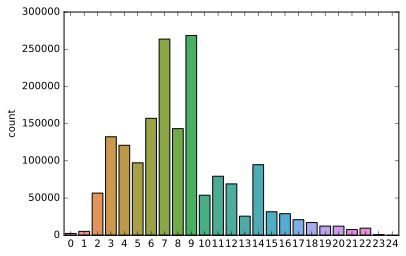

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn  as sns

sns.countplot(data['imp_label'].values)

In [5]:
import pickle
with open("imp_class.dict",'wb') as f:
    pickle.dump(imp_dict,f)

In [6]:
with open("class_2_imp.dict",'wb') as f:
    pickle.dump(class_2_imp,f)